In [2]:
from scipy.io import wavfile
import numpy as np
from scipy import signal
import cv2
import matplotlib.pyplot as plt


np.set_printoptions(precision=3,edgeitems=5,suppress=True,linewidth=50)

In [3]:
rate, audio = wavfile.read('Nangs.wav')

try:
    audio = np.mean(audio, axis=1)
except:
    print("An exception occurred")

# audio = np.mean(audio, axis=1)

M = 1024

print("creating spectrogram")
freqs, times, spectro = signal.spectrogram(audio, fs=rate, window='hanning',nperseg=M, noverlap=M - 100,detrend=False, scaling='spectrum')
print("made spectrogram")

print("len(freqs)",len(freqs))
print("len(times)",len(times))

# spectro = np.swapaxes(spectro,0,1)
print(spectro.shape)

creating spectrogram


made spectrogram
len(freqs) 513
len(times) 47603
(513, 47603)


In [4]:
from sklearn import preprocessing

print(spectro)

spectro = np.log10(spectro + 1)

print(spectro)

spectro = (spectro - np.min(spectro))/np.ptp(spectro)

# xmax, xmin = spectro.max(), spectro.min()
# spectro = (spectro - xmin)/(xmax - xmin)

print(spectro)

# spectro = np.log10(spectro)

print(spectro)

[[ 0.02   0.003  0.007  0.     0.063 ...  0.
   0.     0.     0.     0.   ]
 [ 0.237  0.182  0.238  0.167  0.295 ...  0.
   0.     0.     0.     0.   ]
 [12.777 13.723 14.176 14.988 15.639 ...  0.
   0.     0.     0.     0.   ]
 [21.344 20.946 21.34  22.837 24.775 ...  0.
   0.     0.     0.     0.   ]
 [ 6.026  3.539  0.258  1.646  6.773 ...  0.
   0.     0.     0.     0.   ]
 ...
 [ 0.     0.     0.     0.     0.    ...  0.
   0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.    ...  0.
   0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.    ...  0.
   0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.    ...  0.
   0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.    ...  0.
   0.     0.     0.     0.   ]]


[[0.009 0.001 0.003 0.    0.026 ... 0.    0.
  0.    0.    0.   ]
 [0.092 0.073 0.093 0.067 0.112 ... 0.    0.
  0.    0.    0.   ]
 [1.139 1.168 1.181 1.204 1.221 ... 0.    0.
  0.    0.    0.   ]
 [1.349 1.341 1.349 1.377 1.411 ... 0.    0.
  0.    0.    0.   ]
 [0.847 0.657 0.1   0.423 0.891 ... 0.    0.
  0.    0.    0.   ]
 ...
 [0.    0.    0.    0.    0.    ... 0.    0.
  0.    0.    0.   ]
 [0.    0.    0.    0.    0.    ... 0.    0.
  0.    0.    0.   ]
 [0.    0.    0.    0.    0.    ... 0.    0.
  0.    0.    0.   ]
 [0.    0.    0.    0.    0.    ... 0.    0.
  0.    0.    0.   ]
 [0.    0.    0.    0.    0.    ... 0.    0.
  0.    0.    0.   ]]


[[0.001 0.    0.    0.    0.003 ... 0.    0.
  0.    0.    0.   ]
 [0.011 0.008 0.011 0.008 0.013 ... 0.    0.
  0.    0.    0.   ]
 [0.132 0.136 0.137 0.14  0.142 ... 0.    0.
  0.    0.    0.   ]
 [0.157 0.156 0.157 0.16  0.164 ... 0.    0.
  0.    0.    0.   ]
 [0.098 0.076 0.012 0.049 0.103 ... 0.    0.
  0.    0.    0.   ]
 ...
 [0.    0.    0.    0.    0.    ... 0.    0.
  0.    0.    0.   ]
 [0.    0.    0.    0.    0.    ... 0.    0.
  0.    0.    0.   ]
 [0.    0.    0.    0.    0.    ... 0.    0.
  0.    0.    0.   ]
 [0.    0.    0.    0.    0.    ... 0.    0.
  0.    0.    0.   ]
 [0.    0.    0.    0.    0.    ... 0.    0.
  0.    0.    0.   ]]
[[0.001 0.    0.    0.    0.003 ... 0.    0.
  0.    0.    0.   ]
 [0.011 0.008 0.011 0.008 0.013 ... 0.    0.
  0.    0.    0.   ]
 [0.132 0.136 0.137 0.14  0.142 ... 0.    0.
  0.    0.    0.   ]
 [0.157 0.156 0.157 0.16  0.164 ... 0.    0.
  0.    0.    0.   ]
 [0.098 0.076 0.012 0.049 0.103 ... 0.    0.
  0.    0.    0.   ]
 ...

In [5]:

#Cast entire numpy array to float in range 0-1
# spectro = spectro.astype(np.float64) / (spectro.max())

#scale by 255 for uint8
spectro = 255 * spectro

print(spectro)

spectro = spectro.astype(np.uint8)



[[ 0.257  0.033  0.091  0.004  0.781 ...  0.
   0.     0.     0.     0.   ]
 [ 2.734  2.146  2.747  1.98   3.325 ...  0.
   0.     0.     0.     0.   ]
 [33.722 34.576 34.965 35.636 36.149 ...  0.
   0.     0.     0.     0.   ]
 [39.939 39.708 39.937 40.77  41.776 ...  0.
   0.     0.     0.     0.   ]
 [25.065 19.449  2.951 12.511 26.364 ...  0.
   0.     0.     0.     0.   ]
 ...
 [ 0.001  0.001  0.001  0.002  0.004 ...  0.
   0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.001  0.001 ...  0.
   0.     0.     0.     0.   ]
 [ 0.     0.     0.001  0.001  0.002 ...  0.
   0.     0.     0.     0.   ]
 [ 0.003  0.004  0.004  0.003  0.001 ...  0.
   0.     0.     0.     0.   ]
 [ 0.003  0.004  0.003  0.002  0.001 ...  0.
   0.     0.     0.     0.   ]]


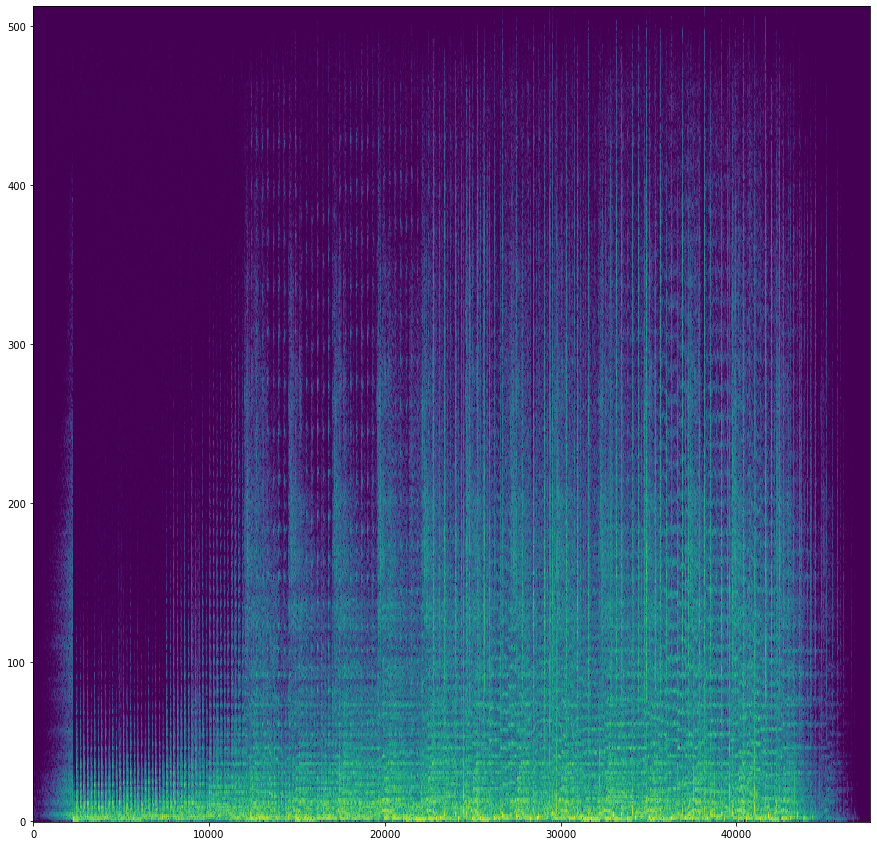

In [6]:
f, ax = plt.subplots(figsize=(15, 15))
plt.imshow(spectro ,aspect='auto')
ax.invert_yaxis()
plt.show()


In [7]:
# print("Running denoising function")
# %time spectro = cv2.fastNlMeansDenoising(spectro,None,5,11)

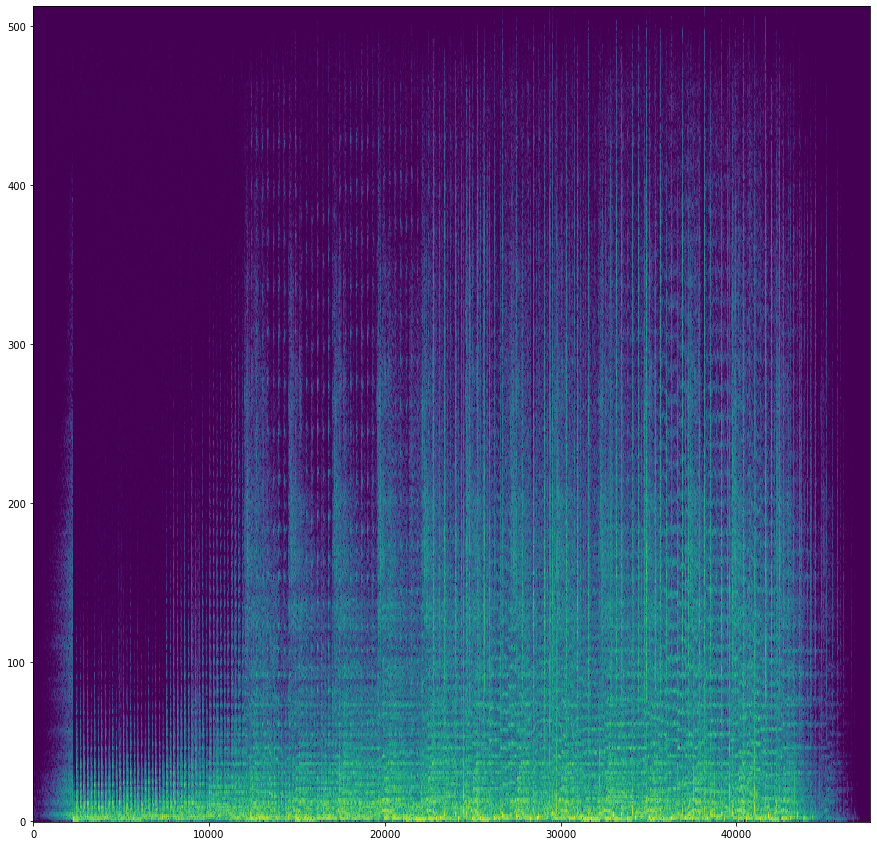

In [8]:
f, ax = plt.subplots(figsize=(15, 15))
plt.imshow(spectro ,aspect='auto')
ax.invert_yaxis()
plt.show()

In [9]:
print("Running threshold function")

# spectro = spectro.astype(np.uint8)
thresh = cv2.adaptiveThreshold(spectro,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15,2)

# blur = cv2.GaussianBlur(spectro,(5,5),0)
# ret,thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

Running threshold function


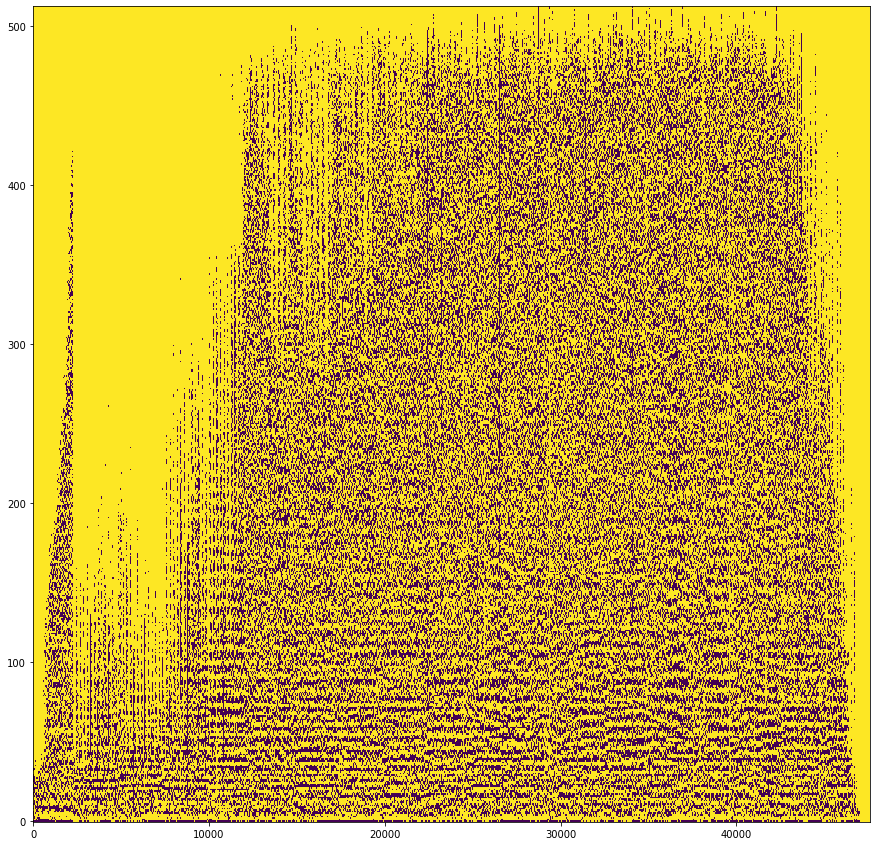

In [10]:
f, ax = plt.subplots(figsize=(15, 15))
plt.imshow(thresh ,aspect='auto')
ax.invert_yaxis()
plt.show()


In [11]:
print("Running cv2.findcontours")
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL,\
                                        cv2.CHAIN_APPROX_NONE)


Running cv2.findcontours


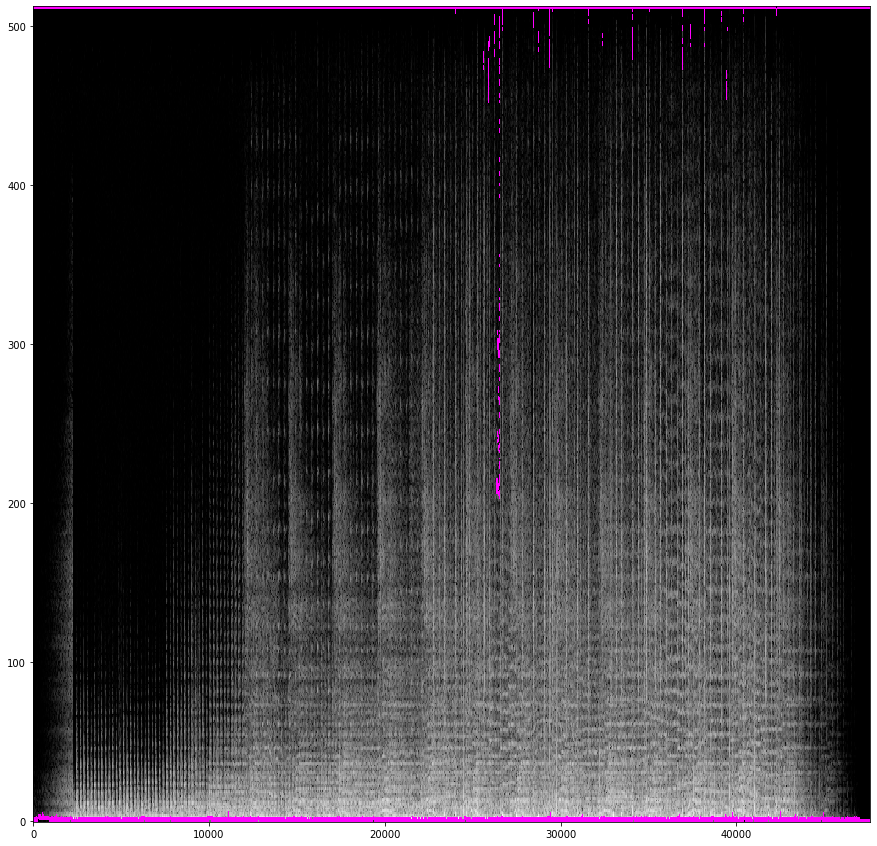

In [12]:
grey_spectro = cv2.cvtColor(spectro, cv2.COLOR_GRAY2BGR)

img = cv2.drawContours(grey_spectro, contours, -1, (255,0,255), 2)

f, ax = plt.subplots(figsize=(15, 15))
plt.imshow(img,aspect='auto')
ax.invert_yaxis()
plt.show()